In [13]:
using CairoMakie

In [14]:
set_theme!(theme_dark())

In [15]:
include("crra_code.jl")

gini_coeff (generic function with 1 method)

In [16]:
model = create_CRRA_model(how_iter = 10)

(n = 1919, na = 101, nz = 19, α = 0.33, A = 0.01, δ = 0.08, β = 0.9, γ = 1.0, r_lb = 0.0, r_ub = 0.11111111111111116, r_iter = 0.0, w = 1.0, ρ = 0.9, μ = 0.0, σ = 0.003, θ = 4.0, ϕ = 0.0, lb = 0.0, ub = 1000.0, toler = 4.0e-7, print_skip = 100, max_iter = 1000, how_iter = 10, toler_prices = 0.001, max_iter_prices = 100, print_skip_prices = 1, agrid = [0.0, 1.0e-5, 0.00016, 0.0008099999999999998, 0.00256, 0.006250000000000001, 0.012959999999999998, 0.02401000000000001, 0.04096, 0.06560999999999999  …  685.7496100000001, 716.3929600000001, 748.0520100000002, 780.7489599999998, 814.5062499999999, 849.3465599999998, 885.2928099999999, 922.3681599999999, 960.59601, 1000.0], zgrid = -3.815376618407356:0.42426406871192845:3.8213766184073563, Π = [3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6; 3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6; … ; 3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6; 3.814697265625e-6 6.8

In [17]:
@time begin
    v_vfi_1, pol_vfi_1, dist_vfi_1, wealth_vfi_1 = equilibrium_vfi_crra(model)
end

Iterating on prices...
////////////////////
Price Iteration: 0
Iterating...
--------------------
Iteration: 0, Error: 0.887618867317094
--------------------
Iteration: 100, Error: 7.929971180442889e-5
--------------------
Converged in 152 iterations for r = 0.05555555555555558 and w = 0.016858265807657185
--------------------
%%%%%%%%%%%%%%%%%%%%
Iter = 0, Ks = 0.04196376955715544, Kd = 0.049144974801661453, diff = -0.007181205244506016
%%%%%%%%%%%%%%%%%%%%
////////////////////
Price Iteration: 1
Iterating...
--------------------
Iteration: 0, Error: 0.18493765569601334
--------------------
Iteration: 100, Error: 3.2262156777639154e-6
--------------------
Converged in 118 iterations for r = 0.08333333333333337 and w = 0.015852469300602034
--------------------
%%%%%%%%%%%%%%%%%%%%
Iter = 1, Ks = 74.99535798710833, Kd = 0.04078698588981427, diff = 74.95457100121853
%%%%%%%%%%%%%%%%%%%%
////////////////////
Price Iteration: 2
Iterating...
--------------------
Iteration: 0, Error: 0.095571

([-42.80419540876016 -42.37993134004777 … -28.440171611241368 -25.66512152073878; -42.77492974578567 -42.36068767146965 … -28.440037983210562 -25.665021717730593; … ; 42.844031521056195 42.84403337287705 … 42.848779442754136 42.85128949504018; 43.2459081893002 43.245909968132516 … 43.25046901517145 43.25288018992627], [4.4051187424872806e-16 4.1612664330867845e-16 … 0.408201139104383 0.6390844853604662; 2.315496330166612e-16 4.242119929014595e-16 … 0.40821069474087673 0.6390940749435736; … ; 924.163845817057 924.1640170370453 … 924.6029422814249 924.8351598464145; 962.0721932414798 962.0723646528852 … 962.5112151225634 962.7433943718275], [0.0 1.0230190074638958e-6 … 1.075747028342786e-6 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0003599590639658361 0.0005501848884143227 … 0.4881995337400881 0.7461959786077446; 0.00037064916813250273 0.0005608749925809893 … 0.4882102238442548 0.7462066687119112; … ; 1026.8875008575014 1026.887691083326 … 1027.3753404321776 10

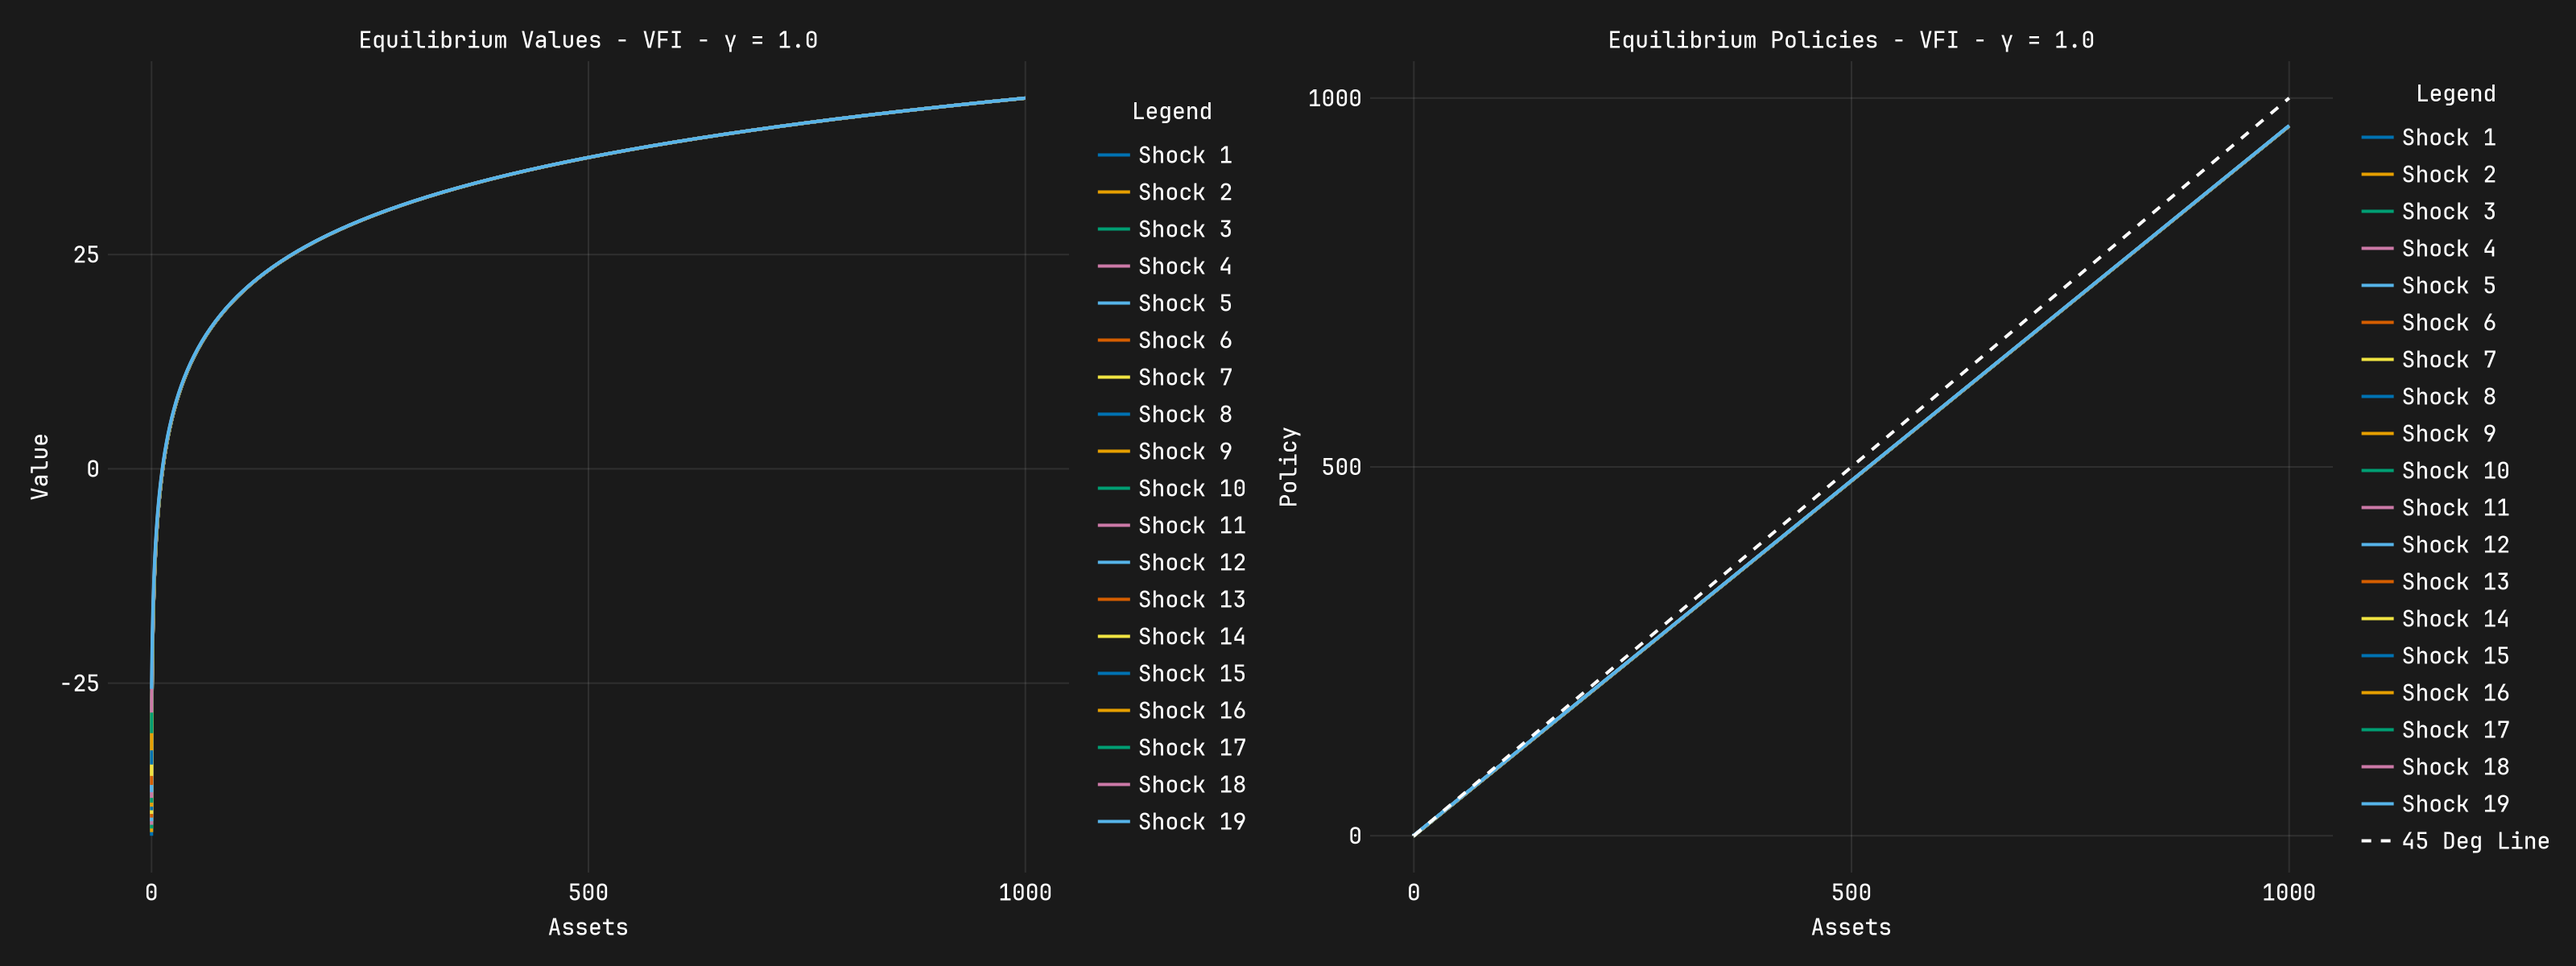

In [18]:
fig = Figure(size = (1600, 600))
ax = Axis(fig[1, 1], 
        xlabel = "Assets", 
        ylabel = "Value", 
        title = "Equilibrium Values - VFI - γ = 1.0",
        titlecolor = :white,
        titlefont = "JetBrains Mono",
        xlabelfont = "JetBrains Mono",
        xlabelcolor = :white,
        ylabelfont = "JetBrains Mono",
        ylabelcolor = :white,
        xticklabelcolor = :white, 
        yticklabelcolor = :white,  
        xticklabelfont = "JetBrains Mono", 
        yticklabelfont = "JetBrains Mono")
for j in 1:model.nz
    lines!(ax, model.agrid, v_vfi_1[:,j], linewidth = 2, label = "Shock $j")
end
legend = Legend(fig[1, 2], 
                ax, 
                "Legend", 
                orientation = :vertical, 
                fontsize = 4,
                labelfont = "JetBrains Mono", 
                labelcolor = :white, 
                titlefont = "JetBrains Mono", 
                titlecolor = :white)
ax = Axis(fig[1,3], 
        xlabel = "Assets", 
        ylabel = "Policy", 
        title = "Equilibrium Policies - VFI - γ = 1.0",
        titlecolor = :white,
        titlefont = "JetBrains Mono",
        xlabelfont = "JetBrains Mono",
        xlabelcolor = :white,
        ylabelfont = "JetBrains Mono",
        ylabelcolor = :white,
        xticklabelcolor = :white, 
        yticklabelcolor = :white,  
        xticklabelfont = "JetBrains Mono", 
        yticklabelfont = "JetBrains Mono")
for j in 1:model.nz
    lines!(ax,  model.agrid, pol_vfi_1[:,j], linewidth = 2, label = "Shock $j")
end
lines!(ax, model.agrid,  model.agrid, color = :white, linewidth = 2, label = "45 Deg Line", linestyle = :dash)
legend = Legend(fig[1, 4], 
                ax, 
                "Legend", 
                orientation = :vertical, 
                fontsize = 4,
                labelfont = "JetBrains Mono", 
                labelcolor = :white, 
                titlefont = "JetBrains Mono", 
                titlecolor = :white)
fig

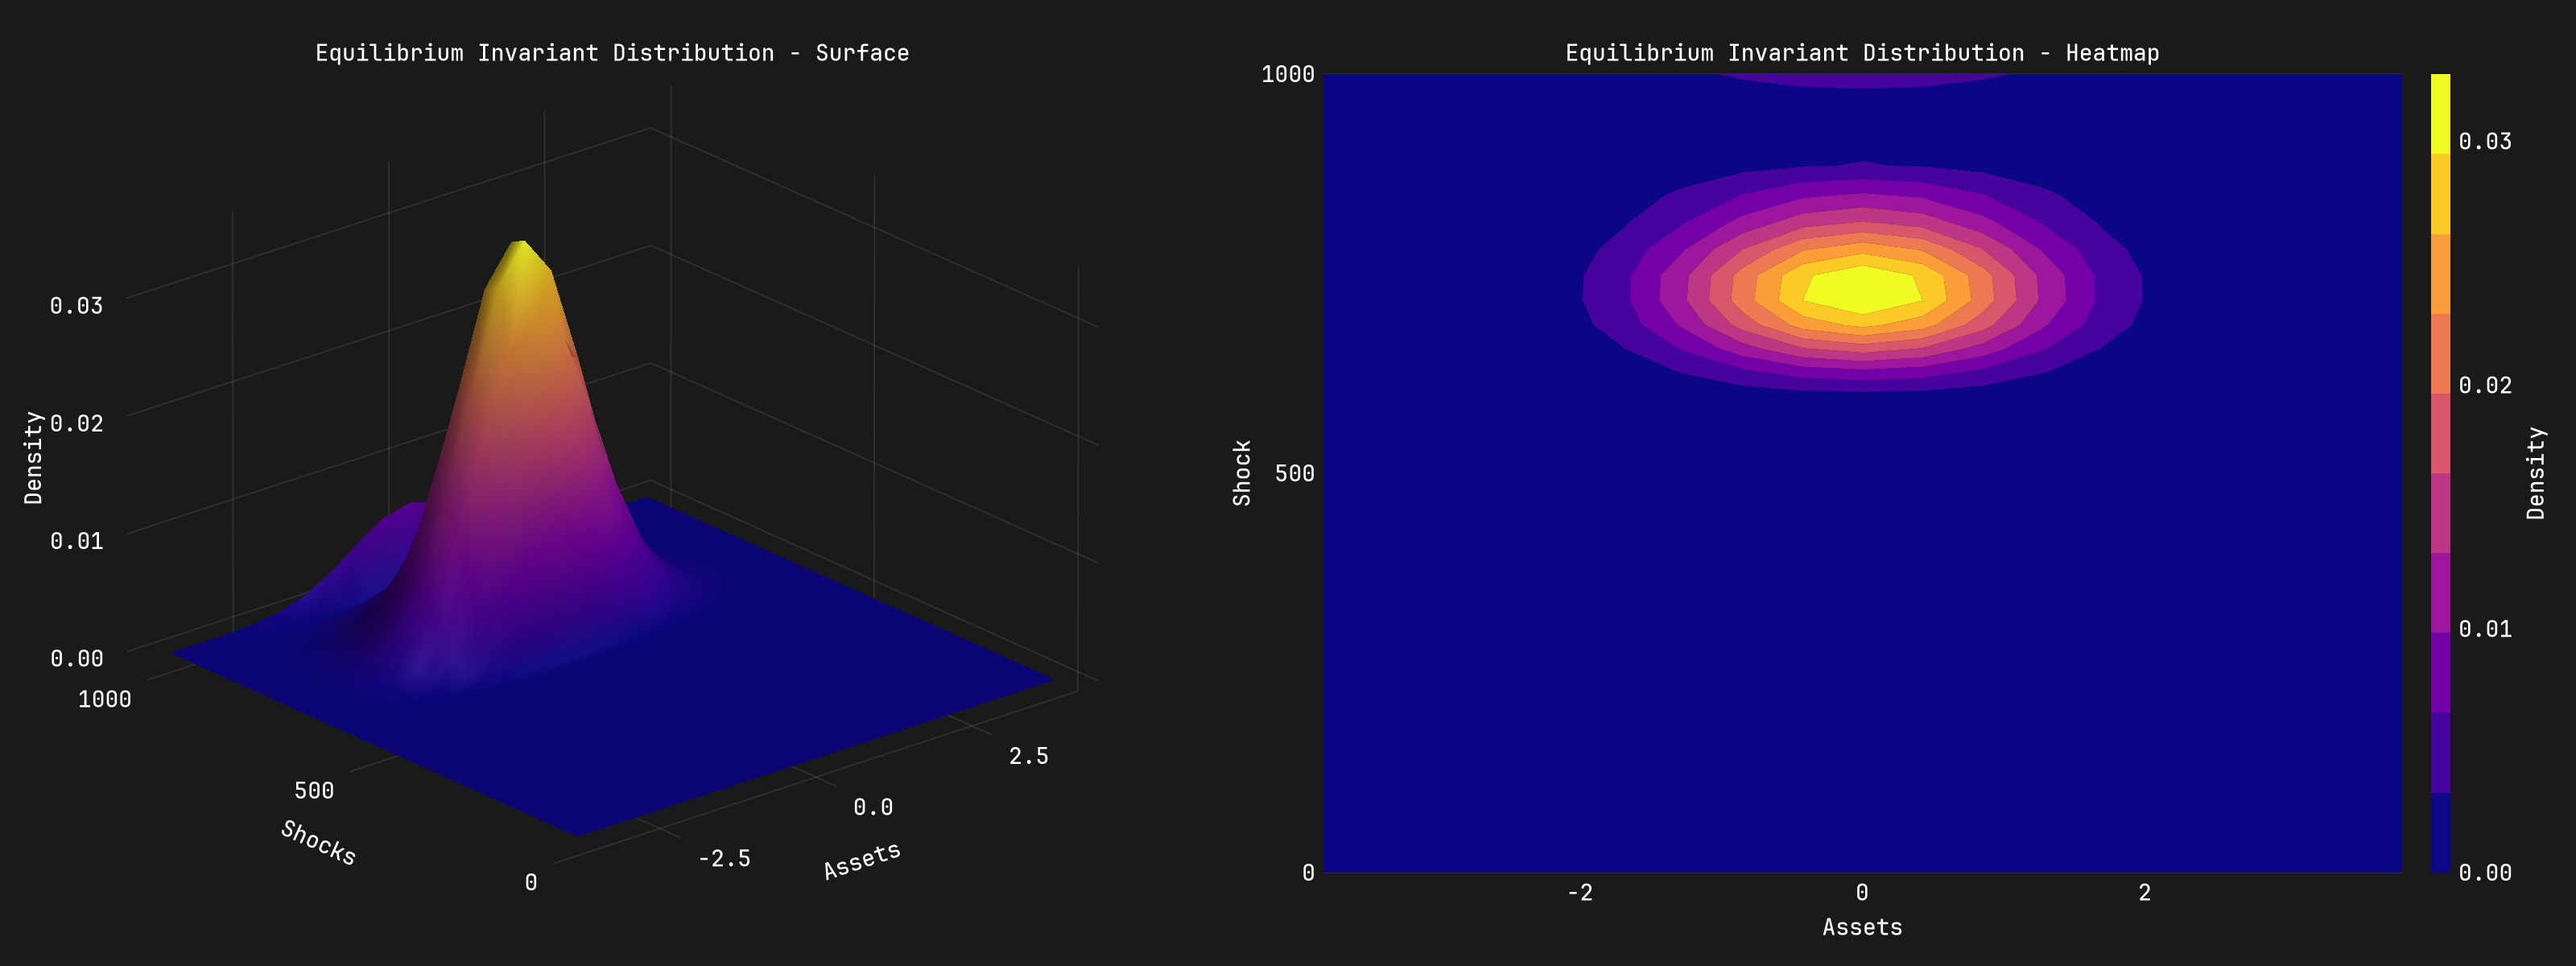

In [19]:
fig = Figure(size = (1600, 600))

ax = Axis3(fig[1,1],
            xlabel = "Assets", 
            ylabel = "Shocks", 
            zlabel = "Density",
            title = "Equilibrium Invariant Distribution - Surface", 
            titlecolor = :white,
            titlefont = "JetBrains Mono",
            xlabelfont = "JetBrains Mono",
            xlabelcolor = :white,
            ylabelfont = "JetBrains Mono",
            ylabelcolor = :white,
            zlabelfont = "JetBrains Mono",
            zlabelcolor = :white,
            xticklabelcolor = :white, 
            yticklabelcolor = :white,
            zticklabelcolor = :white, 
            xticklabelfont = "JetBrains Mono", 
            yticklabelfont = "JetBrains Mono",
            zticklabelfont = "JetBrains Mono")

surface!(ax, model.zgrid, model.agrid, reverse(dist_vfi_1', dims = 2), colormap = :plasma)

ax = Axis(fig[1,2], 
        xlabel = "Assets", 
        ylabel = "Shock",
        title = "Equilibrium Invariant Distribution - Heatmap",
        titlecolor = :white,
        titlefont = "JetBrains Mono",
        xlabelfont = "JetBrains Mono",
        xlabelcolor = :white,
        ylabelfont = "JetBrains Mono",
        ylabelcolor = :white,
        xticklabelcolor = :white,
        yticklabelcolor = :white,
        xticklabelfont = "JetBrains Mono",
        yticklabelfont = "JetBrains Mono")

co = contourf!(ax, model.zgrid, model.agrid, reverse(dist_vfi_1', dims = 2), colormap = :plasma)

cb = Colorbar(fig[1,3], co)
cb.labelcolor = :white
cb.ticklabelcolor = :white
cb.ticklabelfont = "JetBrains Mono"
cb.labelfont = "JetBrains Mono"
cb.labelsize = 14
cb.label = "Density"

fig

In [20]:
model_γ_2 = create_CRRA_model(γ = 2.0)

(n = 1919, na = 101, nz = 19, α = 0.33, A = 0.01, δ = 0.08, β = 0.9, γ = 2.0, r_lb = 0.0, r_ub = 0.11111111111111116, r_iter = 0.0, w = 1.0, ρ = 0.9, μ = 0.0, σ = 0.003, θ = 4.0, ϕ = 0.0, lb = 0.0, ub = 1000.0, toler = 4.0e-7, print_skip = 100, max_iter = 1000, how_iter = 25, toler_prices = 0.001, max_iter_prices = 100, print_skip_prices = 1, agrid = [0.0, 1.0e-5, 0.00016, 0.0008099999999999998, 0.00256, 0.006250000000000001, 0.012959999999999998, 0.02401000000000001, 0.04096, 0.06560999999999999  …  685.7496100000001, 716.3929600000001, 748.0520100000002, 780.7489599999998, 814.5062499999999, 849.3465599999998, 885.2928099999999, 922.3681599999999, 960.59601, 1000.0], zgrid = -3.815376618407356:0.42426406871192845:3.8213766184073563, Π = [3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6; 3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6; … ; 3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6; 3.814697265625e-6 6.8

In [21]:
@time begin 
    v_vfi_2, pol_vfi_2, dist_vfi_2, wealth_vfi_2 = equilibrium_vfi_crra(model_γ_2)
end

Iterating on prices...
////////////////////
Price Iteration: 0
Iterating...
--------------------
Iteration: 0, Error: 0.9996287601162217
--------------------
Iteration: 100, Error: 4.232924706710838e-5
--------------------
Converged in 157 iterations for r = 0.05555555555555558 and w = 0.016858265807657185
--------------------
%%%%%%%%%%%%%%%%%%%%
Iter = 0, Ks = 0.07726826391704074, Kd = 0.049144974801661453, diff = 0.028123289115379285
%%%%%%%%%%%%%%%%%%%%
////////////////////
Price Iteration: 1
Iterating...
--------------------
Iteration: 0, Error: 0.06550540356404709
--------------------
Iteration: 100, Error: 1.439632578528229e-5
--------------------
Converged in 144 iterations for r = 0.02777777777777779 and w = 0.01818347856683305
--------------------
%%%%%%%%%%%%%%%%%%%%
Iter = 1, Ks = 0.055651308260584724, Kd = 0.06181120542064637, diff = -0.006159897160061649
%%%%%%%%%%%%%%%%%%%%
////////////////////
Price Iteration: 2
Iterating...
--------------------
Iteration: 0, Error: 0.0

([-2999.371699386244 -2127.15334310606 … -192.04547626918026 -152.03243537777425; -2935.407208637372 -2099.5315436180344 … -192.04359260138745 -152.0313090731951; … ; -0.23293882581271017 -0.23293877659482318 … -0.2328126733645519 -0.23274601214835308; -0.22376784582115272 -0.2237678004074694 … -0.22365144177493673 -0.2235899299143267], [3.9314077565577506e-16 3.7220715918606846e-16 … 0.4636347343354368 0.7260549512137915; 4.0340442981818427e-16 3.7859228422596094e-16 … 0.4636442172331784 0.7260644911217907; … ; 925.3749549046273 925.3751506253243 … 925.8768827583939 926.1423278153673; 963.332756867176 963.3329525470187 … 963.8345882032796 964.0999854630812], [0.0 2.358570285650456e-7 … 2.4007493298994265e-7 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0003964017790483064 0.0006058863087654627 … 0.5376254776667938 0.8217418119158013; 0.0004067142790483064 0.0006161988087654627 … 0.5376357901667939 0.8217521244158014; … ; 990.6150317142791 990.6152411988088 … 99

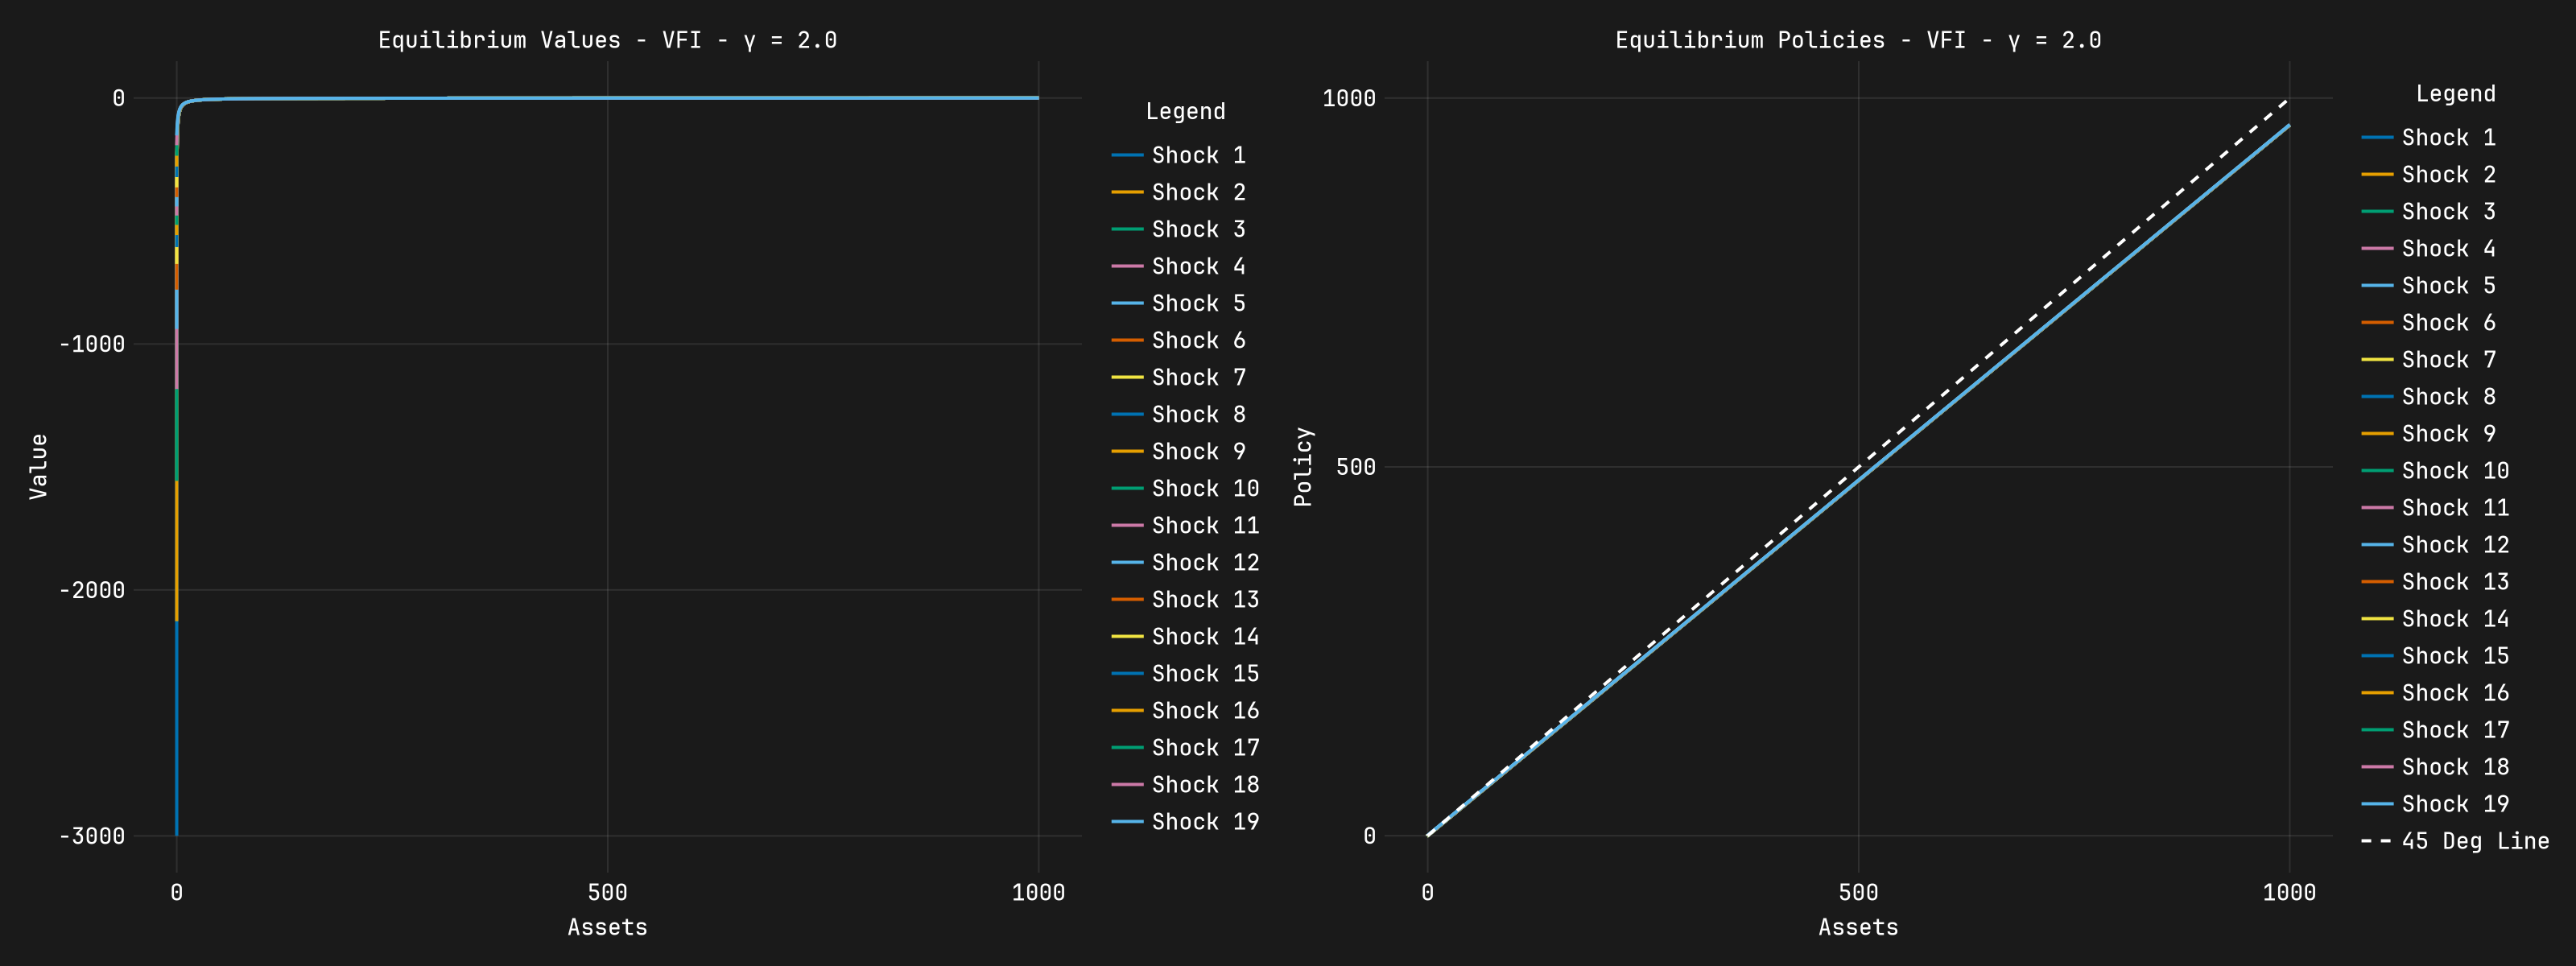

In [25]:
fig = Figure(size = (1600, 600))
ax1 = Axis(fig[1, 1], 
        xlabel = "Assets", 
        ylabel = "Value", 
        title = "Equilibrium Values - VFI - γ = 2.0",
        titlecolor = :white,
        titlefont = "JetBrains Mono",
        xlabelfont = "JetBrains Mono",
        xlabelcolor = :white,
        ylabelfont = "JetBrains Mono",
        ylabelcolor = :white,
        xticklabelcolor = :white, 
        yticklabelcolor = :white,  
        xticklabelfont = "JetBrains Mono", 
        yticklabelfont = "JetBrains Mono")
for j in 1:model_γ_2.nz
    lines!(ax1, model_γ_2.agrid, v_vfi_2[:,j], linewidth = 2, label = "Shock $j")
end
legend = Legend(fig[1, 2], 
                ax1, 
                "Legend", 
                orientation = :vertical, 
                fontsize = 4,
                labelfont = "JetBrains Mono", 
                labelcolor = :white, 
                titlefont = "JetBrains Mono", 
                titlecolor = :white)
ax2 = Axis(fig[1,3], 
        xlabel = "Assets", 
        ylabel = "Policy", 
        title = "Equilibrium Policies - VFI - γ = 2.0",
        titlecolor = :white,
        titlefont = "JetBrains Mono",
        xlabelfont = "JetBrains Mono",
        xlabelcolor = :white,
        ylabelfont = "JetBrains Mono",
        ylabelcolor = :white,
        xticklabelcolor = :white, 
        yticklabelcolor = :white,  
        xticklabelfont = "JetBrains Mono", 
        yticklabelfont = "JetBrains Mono")
for j in 1:model_γ_2.nz
    lines!(ax2, model_γ_2.agrid, pol_vfi_2[:,j], linewidth = 2, label = "Shock $j")
end
lines!(ax2, model_γ_2.agrid, model_γ_2.agrid, color = :white, linewidth = 2, label = "45 Deg Line", linestyle = :dash)
legend = Legend(fig[1, 4], 
                ax2, 
                "Legend", 
                orientation = :vertical, 
                fontsize = 4,
                labelfont = "JetBrains Mono", 
                labelcolor = :white, 
                titlefont = "JetBrains Mono", 
                titlecolor = :white)
fig

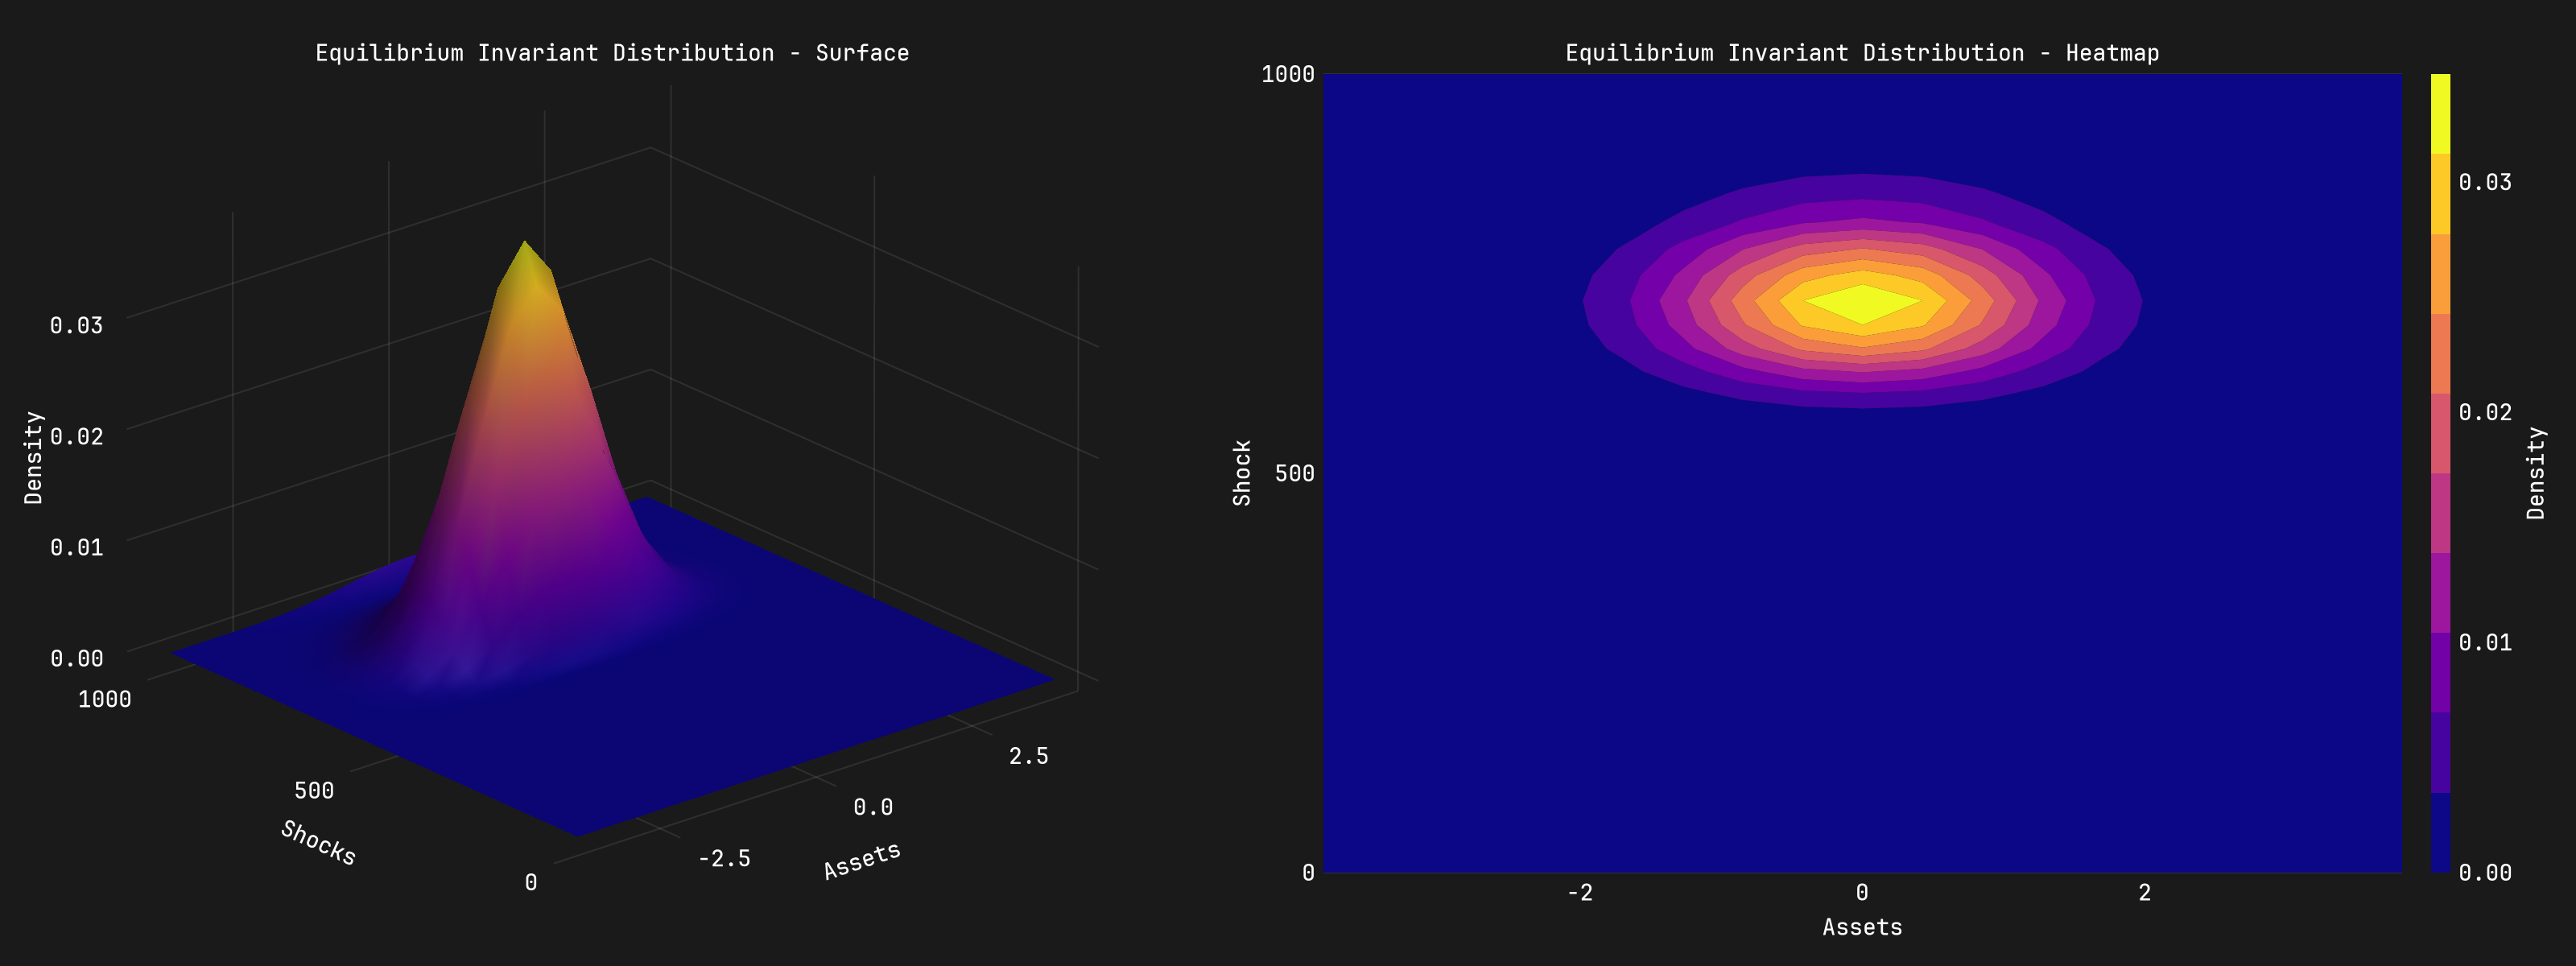

In [26]:
fig = Figure(size = (1600, 600))

ax = Axis3(fig[1,1],
            xlabel = "Assets", 
            ylabel = "Shocks", 
            zlabel = "Density",
            title = "Equilibrium Invariant Distribution - Surface", 
            titlecolor = :white,
            titlefont = "JetBrains Mono",
            xlabelfont = "JetBrains Mono",
            xlabelcolor = :white,
            ylabelfont = "JetBrains Mono",
            ylabelcolor = :white,
            zlabelfont = "JetBrains Mono",
            zlabelcolor = :white,
            xticklabelcolor = :white, 
            yticklabelcolor = :white,
            zticklabelcolor = :white, 
            xticklabelfont = "JetBrains Mono", 
            yticklabelfont = "JetBrains Mono",
            zticklabelfont = "JetBrains Mono")

surface!(ax, model.zgrid, model.agrid, reverse(dist_vfi_2', dims = 2), colormap = :plasma)

ax = Axis(fig[1,2], 
        xlabel = "Assets", 
        ylabel = "Shock",
        title = "Equilibrium Invariant Distribution - Heatmap",
        titlecolor = :white,
        titlefont = "JetBrains Mono",
        xlabelfont = "JetBrains Mono",
        xlabelcolor = :white,
        ylabelfont = "JetBrains Mono",
        ylabelcolor = :white,
        xticklabelcolor = :white,
        yticklabelcolor = :white,
        xticklabelfont = "JetBrains Mono",
        yticklabelfont = "JetBrains Mono")

co = contourf!(ax, model.zgrid, model.agrid, reverse(dist_vfi_2', dims = 2), colormap = :plasma)

cb = Colorbar(fig[1,3], co)
cb.labelcolor = :white
cb.ticklabelcolor = :white
cb.ticklabelfont = "JetBrains Mono"
cb.labelfont = "JetBrains Mono"
cb.labelsize = 14
cb.label = "Density"

fig

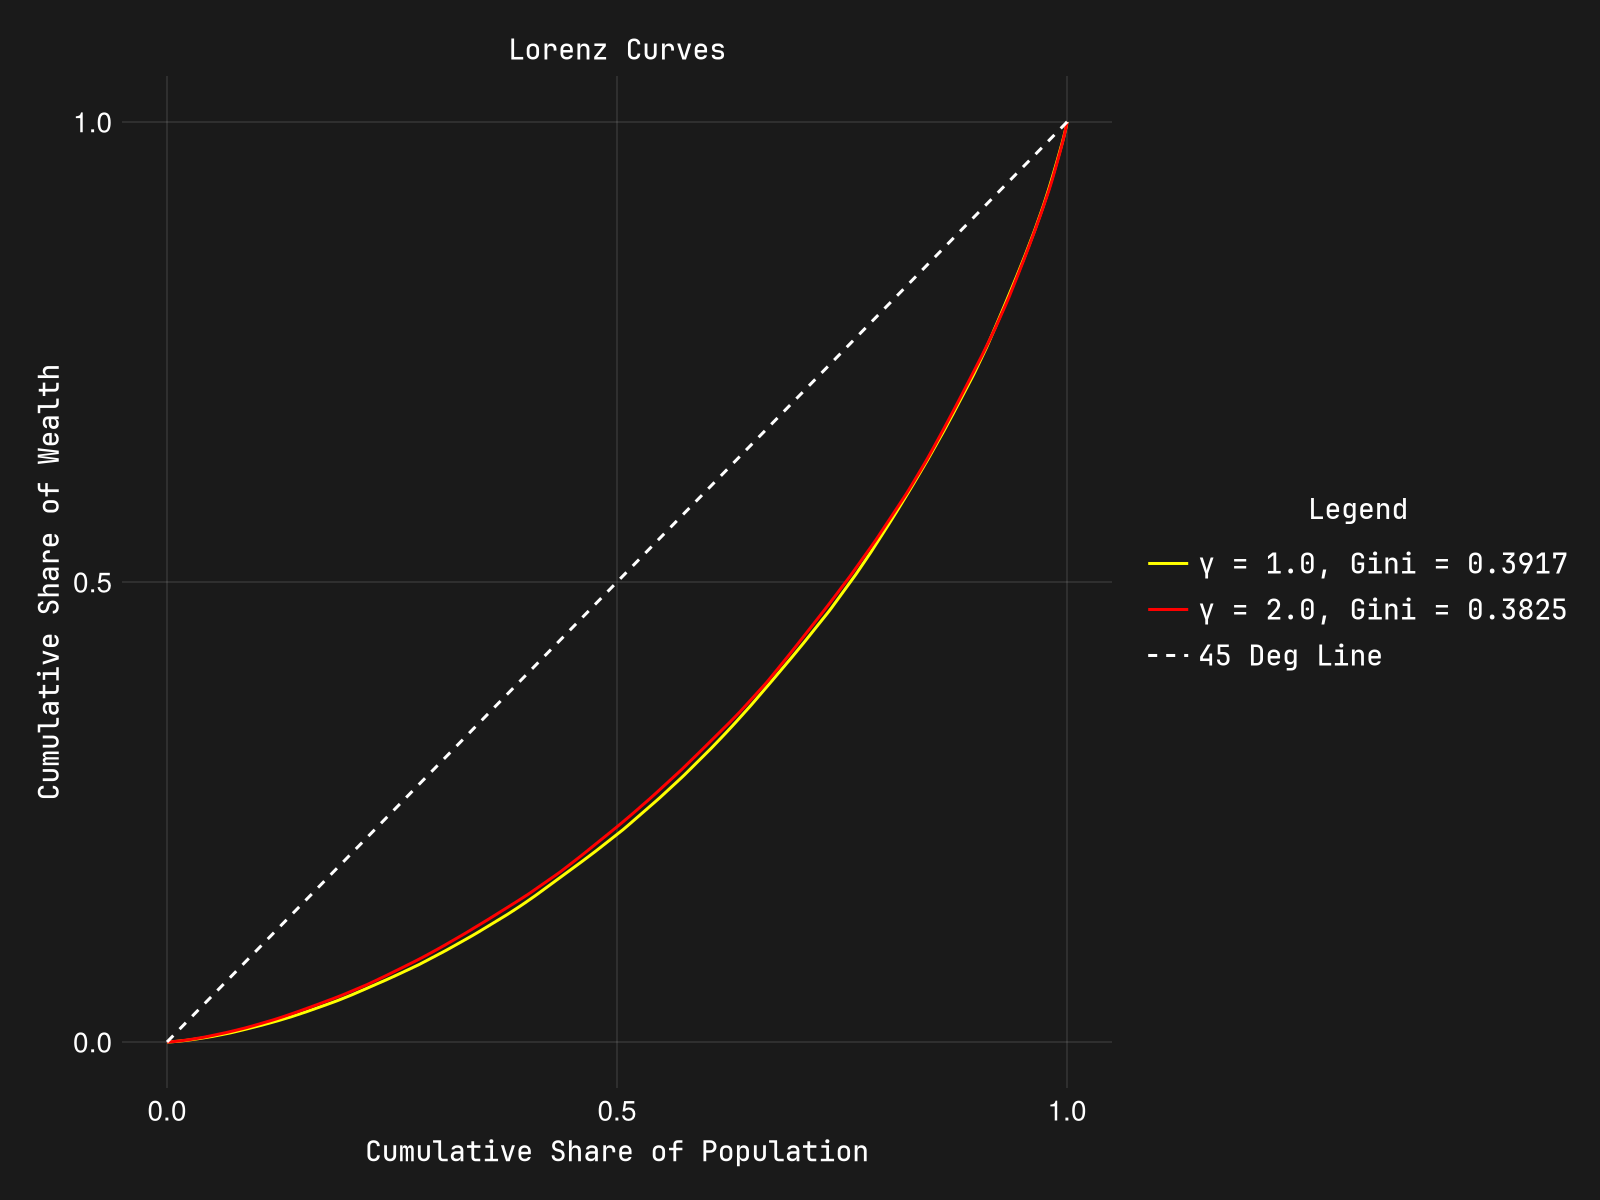

In [27]:
l1, d1, g1 = gini_coeff(dist_vfi_1, wealth_vfi_1, model)
l2, d2, g2 = gini_coeff(dist_vfi_2, wealth_vfi_2, model_γ_2)

fig = Figure(size = (800,600))
ax = Axis(fig[1,1], 
          xlabel = "Cumulative Share of Population", 
          ylabel = "Cumulative Share of Wealth", 
          title = "Lorenz Curves",
          titlecolor = :white,
          titlefont = "JetBrains Mono",
          xlabelfont = "JetBrains Mono",
          xlabelcolor = :white,
          ylabelfont = "JetBrains Mono",
          ylabelcolor = :white,
          xticklabelcolor = :white,
          yticklabelcolor = :white)
lines!(ax, d1, l1, label = "γ = 1.0, Gini = $g1", color = :yellow)
lines!(ax, d2, l2, label = "γ = 2.0, Gini = $g2", color = :red)
lines!(ax, d1, d1, label = "45 Deg Line", color = :white, linestyle = :dash)
legend = Legend(fig[1,2], 
                ax, 
                "Legend", 
                orientation = :vertical, 
                fontsize = 4,
                labelfont = "JetBrains Mono",
                labelcolor = :white,
                titlefont = "JetBrains Mono",
                titlecolor = :white)
fig